<a href="https://colab.research.google.com/github/AbuNuurah/Ede-indigenous-man/blob/master/20_05_22_LSTM_GRU_Oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA

## ANALYSIS

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import GRU
from keras.layers import Dropout
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import time

Using TensorFlow backend.


In [ ]:
# 같은 결과를 나오게 하기 위해 seed 설정
np.random.seed(111)

### 데이터 불러오기

In [ ]:
import datetime
from datetime import date

In [ ]:
dataset = pd.read_csv(r'OilPrice.csv', encoding = 'EUC-KR')  

In [ ]:
index = dataset['구분']

In [ ]:
for i in range(len(index)):
    index[i] = datetime.datetime.strptime(index[i], "%Y년%m월%d일").date()

C:\Users\K.N.W\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4420 entries, 0 to 4419
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      4420 non-null   object 
 1   고급휘발유   4420 non-null   float64
 2   보통휘발유   4420 non-null   float64
 3   자동차용경유  4420 non-null   float64
 4   실내등유    4420 non-null   float64
dtypes: float64(4), object(1)
memory usage: 172.8+ KB


In [ ]:
dataset2 = dataset.set_index("구분")

In [ ]:
dataset2 = pd.DataFrame(dataset2["보통휘발유"])

In [ ]:
dataset2

,보통휘발유
구분,
2008-04-15,1681.33
2008-04-16,1692.15
2008-04-17,1686.56
2008-04-18,1689.68
2008-04-19,1692.91
...,...
2020-05-17,1247.91
2020-05-18,1248.13
2020-05-19,1248.66


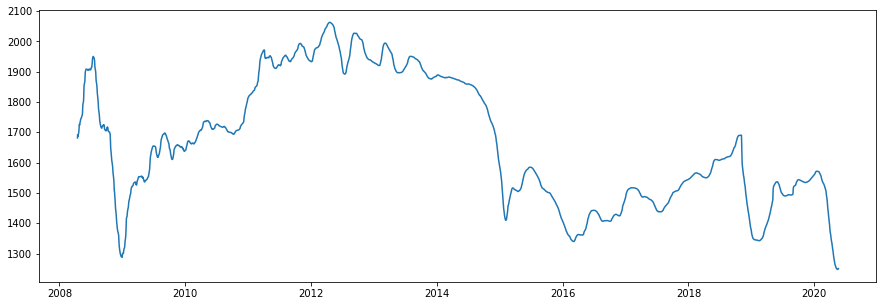

In [ ]:
# 원본 데이터 보기
plt.figure(figsize = (15, 5))
plt.plot(dataset2)
plt.show()

In [ ]:
# 필요한 부분만 불러오기
dataset = dataset.iloc[:, 1:2].values  

In [ ]:
dataset

array([[1861.8 ],
       [1871.39],
       [1874.54],
       ...,
       [1574.97],
       [1575.39],
       [1576.32]])

In [ ]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler을 통해 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(-1, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
dataset

array([[-0.08015617],
       [-0.05607793],
       [-0.04816902],
       ...,
       [-0.80031887],
       [-0.79926435],
       [-0.79692933]])

In [ ]:
data_df = pd.DataFrame(dataset, columns=['price'], index=index)
data_df.head()

,price
구분,
2008-04-15,-0.080156
2008-04-16,-0.056078
2008-04-17,-0.048169
2008-04-18,-0.039959
2008-04-19,-0.033481


### 데이터 분할

In [ ]:
row = int(round(dataset.shape[0] * 0.75))
train_df = data_df[:row]
test_df = data_df[row:]

In [ ]:
row

3315

In [ ]:
dataset

array([[-0.08015617],
       [-0.05607793],
       [-0.04816902],
       ...,
       [-0.80031887],
       [-0.79926435],
       [-0.79692933]])

In [ ]:
#for s in range(1, 8):
#    train_df['shift_{}'.format(s)] = train_df['price'].shift(8-s)
#    test_df['shift_{}'.format(s)] = test_df['price'].shift(8-s)

#train_df.head(19)

In [ ]:
for s in range(1, 8):
    train_df['shift_{}'.format(s)] = train_df['price'].shift(s)
    test_df['shift_{}'.format(s)] = test_df['price'].shift(s)

train_df.head(19)

C:\Users\K.N.W\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\K.N.W\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,price,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7
구분,,,,,,,,
2008-04-15,-0.080156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-16,-0.056078,-0.080156,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-17,-0.048169,-0.056078,-0.080156,NaN,NaN,NaN,NaN,NaN
2008-04-18,-0.039959,-0.048169,-0.056078,-0.080156,NaN,NaN,NaN,NaN
2008-04-19,-0.033481,-0.039959,-0.048169,-0.056078,-0.080156,NaN,NaN,NaN
2008-04-20,-0.041691,-0.033481,-0.039959,-0.048169,-0.056078,-0.080156,NaN,NaN
2008-04-21,-0.029891,-0.041691,-0.033481,-0.039959,-0.048169,-0.056078,-0.080156,NaN
2008-04-22,-0.024568,-0.029891,-0.041691,-0.033481,-0.039959,-0.048169,-0.056078,-0.080156
2008-04-23,-0.010131,-0.024568,-0.029891,-0.041691,-0.033481,-0.039959,-0.048169,-0.056078


In [ ]:
X_train = train_df.dropna().drop('price', axis=1)
y_train = train_df.dropna()[['price']]

X_test = test_df.dropna().drop('price', axis=1)
y_test = test_df.dropna()[['price']]

In [ ]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7
구분,,,,,,,
2008-04-22,-0.029891,-0.041691,-0.033481,-0.039959,-0.048169,-0.056078,-0.080156
2008-04-23,-0.024568,-0.029891,-0.041691,-0.033481,-0.039959,-0.048169,-0.056078
2008-04-24,-0.010131,-0.024568,-0.029891,-0.041691,-0.033481,-0.039959,-0.048169
2008-04-25,0.018592,-0.010131,-0.024568,-0.029891,-0.041691,-0.033481,-0.039959
2008-04-26,0.024066,0.018592,-0.010131,-0.024568,-0.029891,-0.041691,-0.033481


In [ ]:
len(X_train)

3308

In [ ]:
len(X_test)

1098

In [ ]:
y_train.head()

,price
구분,
2008-04-22,-0.024568
2008-04-23,-0.010131
2008-04-24,0.018592
2008-04-25,0.024066
2008-04-26,0.022208


In [ ]:
X_train_values = X_train.values
X_test_values= X_test.values

y_train_values = y_train.values
y_test_values = y_test.values

print(X_train_values.shape)
print(X_train_values)
print(y_train_values.shape)
print(y_train_values)

(3308, 7)
[[-0.02989066 -0.04169125 -0.03348105 ... -0.04816902 -0.05607793
  -0.08015617]
 [-0.02456783 -0.02989066 -0.04169125 ... -0.03995882 -0.04816902
  -0.05607793]
 [-0.01013094 -0.02456783 -0.02989066 ... -0.03348105 -0.03995882
  -0.04816902]
 ...
 [-0.19592754 -0.19110687 -0.19110687 ... -0.19243758 -0.19203585
  -0.18917358]
 [-0.19936729 -0.19592754 -0.19110687 ... -0.19196053 -0.19243758
  -0.19203585]
 [-0.20195338 -0.19936729 -0.19592754 ... -0.19110687 -0.19196053
  -0.19243758]]
(3308, 1)
[[-0.02456783]
 [-0.01013094]
 [ 0.01859221]
 ...
 [-0.19936729]
 [-0.20195338]
 [-0.20589528]]


In [ ]:
X_train_t = X_train_values.reshape(X_train_values.shape[0], X_train_values.shape[1], 1)
X_test_t = X_test_values.reshape(X_test_values.shape[0], X_test_values.shape[1], 1)

print("최종 LSTM DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train_values)

최종 LSTM DATA
(3308, 7, 1)
[[[-0.02989066]
  [-0.04169125]
  [-0.03348105]
  ...
  [-0.04816902]
  [-0.05607793]
  [-0.08015617]]

 [[-0.02456783]
  [-0.02989066]
  [-0.04169125]
  ...
  [-0.03995882]
  [-0.04816902]
  [-0.05607793]]

 [[-0.01013094]
  [-0.02456783]
  [-0.02989066]
  ...
  [-0.03348105]
  [-0.03995882]
  [-0.04816902]]

 ...

 [[-0.19592754]
  [-0.19110687]
  [-0.19110687]
  ...
  [-0.19243758]
  [-0.19203585]
  [-0.18917358]]

 [[-0.19936729]
  [-0.19592754]
  [-0.19110687]
  ...
  [-0.19196053]
  [-0.19243758]
  [-0.19203585]]

 [[-0.20195338]
  [-0.19936729]
  [-0.19592754]
  ...
  [-0.19110687]
  [-0.19196053]
  [-0.19243758]]]
[[-0.02456783]
 [-0.01013094]
 [ 0.01859221]
 ...
 [-0.19936729]
 [-0.20195338]
 [-0.20589528]]


## Adaboost-LSTM MODEL

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
def lstm_model():                                           
    # create model
    model = Sequential()
    #model.add(LSTM(256, return_sequences=False, input_shape=(7, 1)))
    #model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=False, input_shape=(7, 1)))
    model.add(Dropout(0.5))
    #model.add(LSTM(64, return_sequences=False))
    model.add(Dense(1, kernel_initializer='normal', activation='tanh'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
lstm_model().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#예측기 만들기
ABL_estimator = KerasRegressor(build_fn = lstm_model, epochs=50, batch_size=30, verbose=1)

In [ ]:
boosted_lstm = AdaBoostRegressor(base_estimator= ABL_estimator, n_estimators=200, random_state=0) 

In [ ]:
#rescaled_train_X = X_train_t.reshape(X_train_t.shape[0],X_train_t.shape[1],1)

In [ ]:
#boosted_ann.fit(rescaled_train_X, y_train) #부사리선생님은 이거 사용

In [ ]:
boosted_lstm.fit(X_train_t, y_train)# scale your training data 

C:\Users\K.N.W\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/50
3308/3308 [==============================] - 4s 1ms/step - loss: 0.0273
Epoch 2/50
3308/3308 [==============================] - 1s 417us/step - loss: 0.0033
Epoch 3/50
3308/3308 [==============================] - 1s 393us/step - loss: 0.0024
Epoch 4/50
3308/3308 [==============================] - 1s 445us/step - loss: 0.0019
Epoch 5/50
3308/3308 [==============================] - 1s 435us/step - loss: 0.0016
Epoch 6/50
3308/3308 [==============================] - 1s 421us/step - loss: 0.0015
Epoch 7/50
3308/3308 [==============================] - 2s 508us/step - loss: 0.0016
Epoch 8/50
3308/3308 [==============================] - 1s 452us/step - loss: 0.0014
Epoch 9/50
3308/3308 [==============================] - 1s 435us/step - loss: 0.0015
Epoch 10/50
3308/3308 [==============================] - 1s 435us/step - loss: 0.0014
Epoch 11/50
3308/3308 [==============================] - 1s 442us/step - loss: 0.0014 
Epoch 12/50
3308/3308 [==============================] - 1s 418u

3308/3308 [==============================] - 2s 499us/step - loss: 0.0014
Epoch 46/50
3308/3308 [==============================] - 2s 466us/step - loss: 0.0013
Epoch 47/50
3308/3308 [==============================] - 2s 508us/step - loss: 0.0014
Epoch 48/50
3308/3308 [==============================] - 1s 444us/step - loss: 0.0014
Epoch 49/50
3308/3308 [==============================] - 2s 468us/step - loss: 0.0014
Epoch 50/50
3308/3308 [==============================] - 1s 296us/step
Epoch 1/50
3308/3308 [==============================] - 4s 1ms/step - loss: 0.0333
Epoch 2/50
3308/3308 [==============================] - 2s 522us/step - loss: 0.0045
Epoch 3/50
3308/3308 [==============================] - 2s 566us/step - loss: 0.0032
Epoch 4/50
3308/3308 [==============================] - 2s 472us/step - loss: 0.0025
Epoch 5/50
3308/3308 [==============================] - 2s 493us/step - loss: 0.0022 0s - loss: 0
Epoch 6/50
3308/3308 [==============================] - 1s 413us/step - los

3308/3308 [==============================] - 1s 395us/step - loss: 0.0037
Epoch 17/50
3308/3308 [==============================] - 1s 374us/step - loss: 0.0035
Epoch 18/50
3308/3308 [==============================] - 1s 428us/step - loss: 0.0034
Epoch 19/50
3308/3308 [==============================] - 1s 417us/step - loss: 0.0034
Epoch 20/50
3308/3308 [==============================] - 1s 415us/step - loss: 0.0034
Epoch 21/50
3308/3308 [==============================] - 1s 432us/step - loss: 0.0034
Epoch 22/50
3308/3308 [==============================] - 1s 399us/step - loss: 0.0060
Epoch 17/50
3308/3308 [==============================] - 1s 407us/step - loss: 0.0057
Epoch 18/50
3308/3308 [==============================] - 1s 419us/step - loss: 0.0056
Epoch 19/50
3308/3308 [==============================] - 1s 365us/step - loss: 0.0055
Epoch 20/50
3308/3308 [==============================] - 1s 433us/step - loss: 0.0055
Epoch 21/50
3308/3308 [==============================] - 1s 399us/

Epoch 3/50
3308/3308 [==============================] - 2s 538us/step - loss: 0.0080
Epoch 4/50
3308/3308 [==============================] - 2s 469us/step - loss: 0.0072
Epoch 5/50
3308/3308 [==============================] - 1s 403us/step - loss: 0.0071
Epoch 6/50
3308/3308 [==============================] - 1s 426us/step - loss: 0.0070
Epoch 7/50
3308/3308 [==============================] - 1s 390us/step - loss: 0.0067
Epoch 8/50
3308/3308 [==============================] - 1s 396us/step - loss: 0.0067
Epoch 9/50
3308/3308 [==============================] - 1s 392us/step - loss: 0.0065
Epoch 10/50
3308/3308 [==============================] - 1s 418us/step - loss: 0.0066
Epoch 11/50
3308/3308 [==============================] - 1s 436us/step - loss: 0.0063
Epoch 12/50
3308/3308 [==============================] - 1s 409us/step - loss: 0.0062
Epoch 13/50
3308/3308 [==============================] - 2s 460us/step - loss: 0.0061
Epoch 14/50
3308/3308 [==============================] - 1s 3

3308/3308 [==============================] - 1s 410us/step - loss: 0.0041
Epoch 47/50
3308/3308 [==============================] - 1s 395us/step - loss: 0.0038
Epoch 48/50
3308/3308 [==============================] - 1s 411us/step - loss: 0.0039
Epoch 49/50
3308/3308 [==============================] - 1s 430us/step - loss: 0.0037
Epoch 50/50
3308/3308 [==============================] - 1s 192us/step
Epoch 1/50
3308/3308 [==============================] - 4s 1ms/step - loss: 0.0328
Epoch 2/50
3308/3308 [==============================] - 1s 384us/step - loss: 0.0094
Epoch 3/50
3308/3308 [==============================] - 1s 388us/step - loss: 0.0082
Epoch 4/50
3308/3308 [==============================] - 1s 390us/step - loss: 0.0075
Epoch 5/50
3308/3308 [==============================] - 1s 405us/step - loss: 0.0076
Epoch 6/50
3308/3308 [==============================] - 1s 382us/step - loss: 0.0074
Epoch 7/50
3308/3308 [==============================] - 1s 423us/step - loss: 0.0071
Epoc

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3308/3308 [==============================] - 1s 308us/step - loss: 0.0062
Epoch 20/50
3308/3308 [==============================] - 1s 341us/step - loss: 0.0058
Epoch 21/50
3308/3308 [==============================] - 1s 351us/step - loss: 0.0056 0s - l
Epoch 22/50
3308/3308 [==============================] - 1s 376us/step - loss: 0.0057
Epoch 23/50
3308/3308 [==============================] - 1s 369us/step - loss: 0.0063
Epoch 24/50
3308/3308 [==============================] - 1s 407us/step - loss: 0.0060
Epoch 25/50
3308/3308 [==============================] - 1s 412us/step - loss: 0.0057
Epoch 26/50
3308/3308 [==============================] - 1s 284us/step - loss: 0.0056
Epoch 27/50
3308/3308 [==============================] - 1s 312us/step - loss: 0.0054
Epoch 28/50
3308/3308 [==============================] - 1s 266us/step - loss: 0.0053
Epoch 29/50
3308/3308 [==============================] - 1s 289us/step - loss: 0.0052
Epoch 30/50
3308/3308 [==============================] - 1s

AdaBoostRegressor(base_estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000018C4FB5F588>,
                  learning_rate=1.0, loss='linear', n_estimators=200,
                  random_state=0)

In [ ]:
start = time.time()
y_pred = boosted_lstm.predict(X_test_t)
end = time.time()
total = end-start

print(total)

1098/1098 [==============================] - 0s 70us/step
9.888773441314697


In [ ]:
y_pred = pd.DataFrame(y_pred, columns = ["price"], index = y_test.index)

In [ ]:
testPredict = scaler.inverse_transform(y_pred)
Ydata = scaler.inverse_transform(y_test)

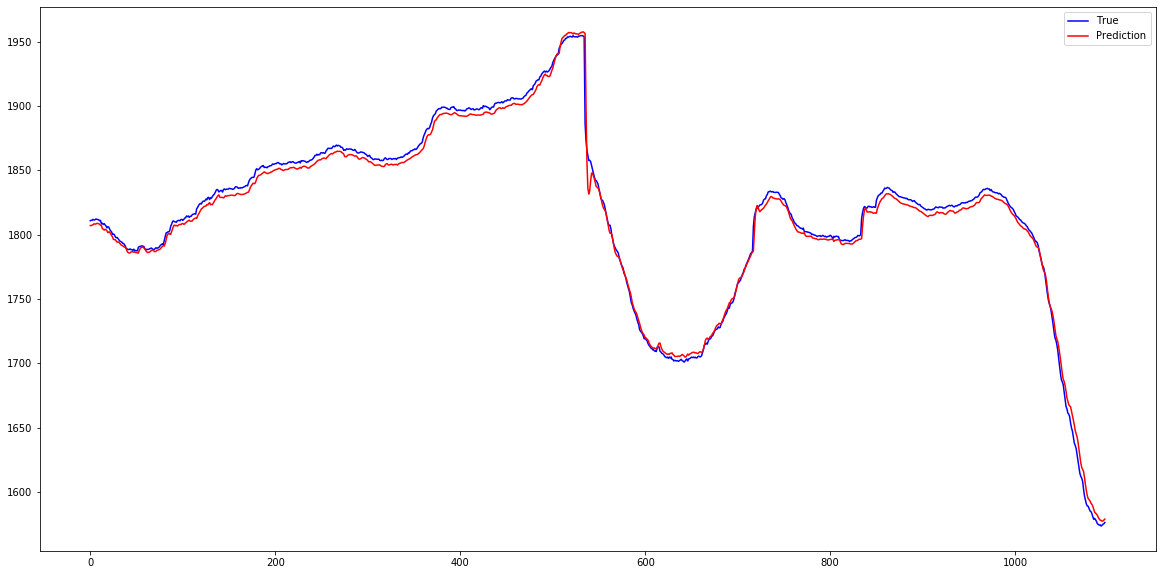

In [ ]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(Ydata, label='True', color = 'Blue')
ax.plot(testPredict, label='Prediction', color='Red')
ax.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
mse = mean_squared_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
rmse = np.sqrt(mse)

In [ ]:
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  4.241978895399306
MSE:  28.255917783145506
RMSE:  5.31562957542618


# 일반 LSTM 모형

In [ ]:
model = Sequential()

model.add(LSTM(128, return_sequences=False, input_shape=(7, 1)))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='tanh'))
    
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start = time.time()
model.fit(X_train_t, y_train, batch_size = 30, epochs = 50)
end = time.time()
total = end-start

print(total)

Epoch 1/50
3308/3308 [==============================] - 2s 598us/step - loss: 0.0303
Epoch 2/50
3308/3308 [==============================] - 1s 322us/step - loss: 0.0035
Epoch 3/50
3308/3308 [==============================] - 1s 301us/step - loss: 0.0025 0s
Epoch 4/50
3308/3308 [==============================] - 1s 285us/step - loss: 0.0019
Epoch 5/50
3308/3308 [==============================] - 1s 276us/step - loss: 0.0016
Epoch 6/50
3308/3308 [==============================] - 1s 277us/step - loss: 0.0016
Epoch 7/50
3308/3308 [==============================] - 1s 376us/step - loss: 0.0015
Epoch 8/50
3308/3308 [==============================] - 1s 306us/step - loss: 0.0014
Epoch 9/50
3308/3308 [==============================] - 1s 277us/step - loss: 0.0015
Epoch 10/50
3308/3308 [==============================] - 1s 256us/step - loss: 0.0015
Epoch 11/50
3308/3308 [==============================] - 1s 275us/step - loss: 0.0014
Epoch 12/50
3308/3308 [==============================] - 1s 

<function matplotlib.pyplot.show(*args, **kw)>

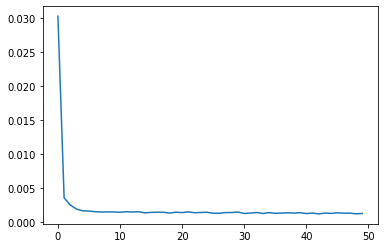

In [ ]:
plt.plot(model.history.history['loss'])
plt.show

In [ ]:
y_pred = model.predict(X_test_t)
y_pred = pd.DataFrame(y_pred, columns = ["price"], index = y_test.index)

In [ ]:
testPredict = scaler.inverse_transform(y_pred)
Ydata = scaler.inverse_transform(y_test)

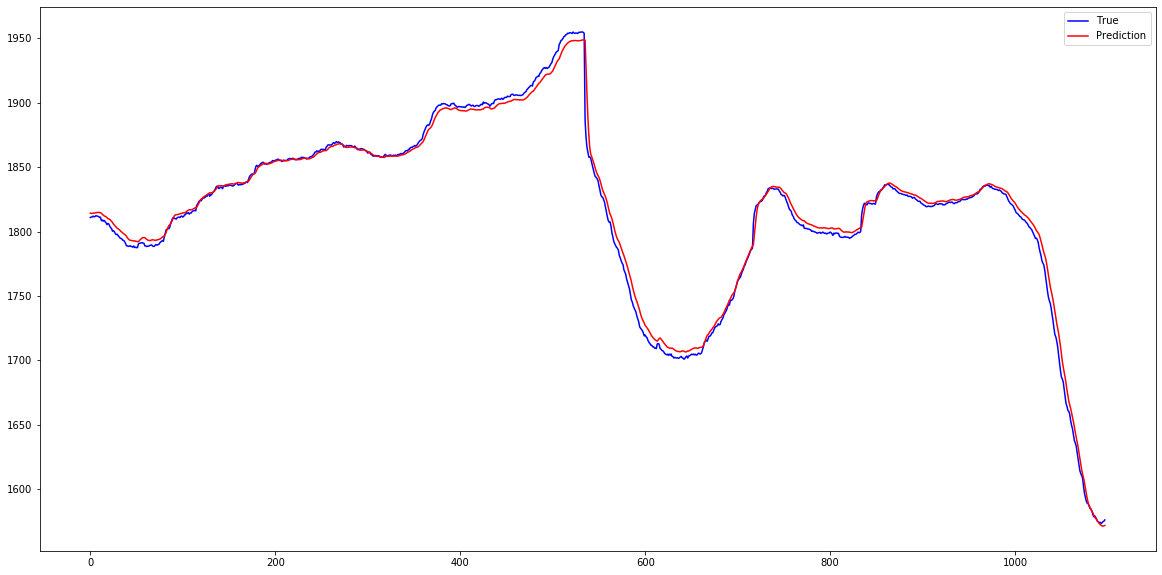

In [ ]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(Ydata, label='True', color='Blue')
ax.plot(testPredict, label='Prediction', color='Red')
ax.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
mse = mean_squared_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
rmse = np.sqrt(mse)

In [ ]:
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  4.000434792662795
MSE:  34.03591201353585
RMSE:  5.83403051187906


## Adaboost-GRU MODEL

In [ ]:
def gru_model():                                           
    # create model
    model = Sequential()
    model.add(GRU(128, return_sequences=False, input_shape=(7, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='normal', activation='tanh'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
gru_model().summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 128)               49920     
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 129       
Total params: 50,049
Trainable params: 50,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#예측기 만들기
ABL_estimator = KerasRegressor(build_fn = gru_model, epochs=50, batch_size=30, verbose=1)

In [ ]:
boosted_gru = AdaBoostRegressor(base_estimator= ABL_estimator, n_estimators=200, random_state=0) #

In [ ]:
boosted_gru.fit(X_train_t, y_train)# scale your training data 

C:\Users\K.N.W\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/50
3308/3308 [==============================] - 2s 523us/step - loss: 0.0314
Epoch 2/50
3308/3308 [==============================] - 1s 282us/step - loss: 0.0034
Epoch 3/50
3308/3308 [==============================] - 1s 315us/step - loss: 0.0031
Epoch 4/50
3308/3308 [==============================] - 1s 317us/step - loss: 0.0029
Epoch 5/50
3308/3308 [==============================] - 1s 306us/step - loss: 0.0024
Epoch 6/50
3308/3308 [==============================] - 1s 276us/step - loss: 0.0018
Epoch 7/50
3308/3308 [==============================] - 1s 283us/step - loss: 0.0017
Epoch 8/50
3308/3308 [==============================] - 1s 281us/step - loss: 0.0016
Epoch 9/50
3308/3308 [==============================] - 1s 274us/step - loss: 0.0016
Epoch 10/50
3308/3308 [==============================] - 1s 283us/step - loss: 0.0016
Epoch 11/50
3308/3308 [==============================] - 1s 283us/step - loss: 0.0016
Epoch 12/50
3308/3308 [==============================] - 1s 305

3308/3308 [==============================] - 1s 273us/step - loss: 0.0016
Epoch 46/50
3308/3308 [==============================] - 1s 246us/step - loss: 0.0015
Epoch 47/50
3308/3308 [==============================] - 1s 255us/step - loss: 0.0014
Epoch 48/50
3308/3308 [==============================] - 1s 274us/step - loss: 0.0015
Epoch 49/50
3308/3308 [==============================] - 1s 255us/step - loss: 0.0014
Epoch 50/50
3308/3308 [==============================] - 0s 76us/step
Epoch 1/50
3308/3308 [==============================] - 2s 476us/step - loss: 0.0327
Epoch 2/50
3308/3308 [==============================] - 1s 280us/step - loss: 0.0055
Epoch 3/50
3308/3308 [==============================] - 1s 317us/step - loss: 0.0052
Epoch 4/50
3308/3308 [==============================] - 1s 358us/step - loss: 0.0043
Epoch 5/50
3308/3308 [==============================] - 1s 395us/step - loss: 0.0033
Epoch 6/50
3308/3308 [==============================] - 1s 305us/step - loss: 0.0032
Ep

3308/3308 [==============================] - 1s 301us/step - loss: 0.0023
Epoch 40/50
3308/3308 [==============================] - 1s 354us/step - loss: 0.0021
Epoch 41/50
3308/3308 [==============================] - 1s 288us/step - loss: 0.0021
Epoch 42/50
3308/3308 [==============================] - 1s 289us/step - loss: 0.0022
Epoch 43/50
3308/3308 [==============================] - 1s 326us/step - loss: 0.0021
Epoch 44/50
3308/3308 [==============================] - 1s 335us/step - loss: 0.0020
Epoch 45/50
3308/3308 [==============================] - 1s 258us/step - loss: 0.0022
Epoch 46/50
3308/3308 [==============================] - 1s 271us/step - loss: 0.0019
Epoch 47/50
3308/3308 [==============================] - 1s 293us/step - loss: 0.0021
Epoch 48/50
3308/3308 [==============================] - 1s 275us/step - loss: 0.0020
Epoch 49/50
3308/3308 [==============================] - 1s 276us/step - loss: 0.0022
Epoch 50/50
3308/3308 [==============================] - 0s 96us/s

3308/3308 [==============================] - 1s 274us/step - loss: 0.0028
Epoch 34/50
3308/3308 [==============================] - 1s 275us/step - loss: 0.0026
Epoch 35/50
3308/3308 [==============================] - 1s 258us/step - loss: 0.0026
Epoch 36/50
3308/3308 [==============================] - 1s 280us/step - loss: 0.0024
Epoch 37/50
3308/3308 [==============================] - 1s 286us/step - loss: 0.0025
Epoch 38/50
3308/3308 [==============================] - 1s 280us/step - loss: 0.0025
Epoch 39/50
3308/3308 [==============================] - 1s 302us/step - loss: 0.0025
Epoch 40/50
3308/3308 [==============================] - 1s 326us/step - loss: 0.0023
Epoch 41/50
3308/3308 [==============================] - 1s 288us/step - loss: 0.0023
Epoch 42/50
3308/3308 [==============================] - 1s 271us/step - loss: 0.0023
Epoch 43/50
3308/3308 [==============================] - 1s 260us/step - loss: 0.0022
Epoch 44/50
3308/3308 [==============================] - 1s 270us/

3308/3308 [==============================] - 2s 558us/step - loss: 0.0035 0s - 
Epoch 27/50
3308/3308 [==============================] - 1s 388us/step - loss: 0.0036
Epoch 28/50
3308/3308 [==============================] - 1s 328us/step - loss: 0.0033
Epoch 29/50
3308/3308 [==============================] - 1s 294us/step - loss: 0.0036
Epoch 30/50
3308/3308 [==============================] - 1s 379us/step - loss: 0.0034
Epoch 31/50
3308/3308 [==============================] - 1s 381us/step - loss: 0.0032
Epoch 32/50
3308/3308 [==============================] - 1s 321us/step - loss: 0.0031
Epoch 33/50
3308/3308 [==============================] - 1s 321us/step - loss: 0.0031
Epoch 34/50
3308/3308 [==============================] - 1s 356us/step - loss: 0.0032
Epoch 35/50
3308/3308 [==============================] - 2s 455us/step - loss: 0.0031
Epoch 36/50
3308/3308 [==============================] - 1s 404us/step - loss: 0.0031
Epoch 37/50
3308/3308 [==============================] - 1s 

3308/3308 [==============================] - 1s 289us/step - loss: 0.0049 0s -
Epoch 20/50
3308/3308 [==============================] - 1s 329us/step - loss: 0.0049
Epoch 21/50
3308/3308 [==============================] - 1s 334us/step - loss: 0.0045
Epoch 22/50
3308/3308 [==============================] - 1s 289us/step - loss: 0.0044
Epoch 23/50
3308/3308 [==============================] - 1s 281us/step - loss: 0.0042
Epoch 24/50
3308/3308 [==============================] - 1s 282us/step - loss: 0.0040
Epoch 25/50
3308/3308 [==============================] - 1s 325us/step - loss: 0.0042
Epoch 26/50
3308/3308 [==============================] - 1s 330us/step - loss: 0.0038
Epoch 27/50
3308/3308 [==============================] - 1s 281us/step - loss: 0.0038
Epoch 28/50
3308/3308 [==============================] - 1s 284us/step - loss: 0.0037
Epoch 29/50
3308/3308 [==============================] - 1s 296us/step - loss: 0.0036
Epoch 30/50
3308/3308 [==============================] - 1s 2

Epoch 12/50
3308/3308 [==============================] - 1s 358us/step - loss: 0.0056
Epoch 13/50
3308/3308 [==============================] - 1s 287us/step - loss: 0.0054
Epoch 14/50
3308/3308 [==============================] - 1s 265us/step - loss: 0.0053
Epoch 15/50
3308/3308 [==============================] - 1s 329us/step - loss: 0.0056
Epoch 16/50
3308/3308 [==============================] - 1s 312us/step - loss: 0.0056
Epoch 17/50
3308/3308 [==============================] - 1s 367us/step - loss: 0.0053
Epoch 18/50
3308/3308 [==============================] - 1s 366us/step - loss: 0.0049
Epoch 19/50
3308/3308 [==============================] - 1s 329us/step - loss: 0.0050
Epoch 20/50
3308/3308 [==============================] - 1s 305us/step - loss: 0.0048
Epoch 21/50
3308/3308 [==============================] - 1s 389us/step - loss: 0.0052
Epoch 22/50
3308/3308 [==============================] - 1s 355us/step - loss: 0.0051
Epoch 23/50
3308/3308 [==============================]

AdaBoostRegressor(base_estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000018CDBBC9CC8>,
                  learning_rate=1.0, loss='linear', n_estimators=200,
                  random_state=0)

In [ ]:
start = time.time()
y_pred = boosted_gru.predict(X_test_t)
end = time.time()
total = end-start

print(total)

1098/1098 [==============================] - 0s 85us/step
1.1423468589782715


In [ ]:
y_pred = pd.DataFrame(y_pred, columns = ["price"], index = y_test.index)

In [ ]:
testPredict = scaler.inverse_transform(y_pred)
Ydata = scaler.inverse_transform(y_test)

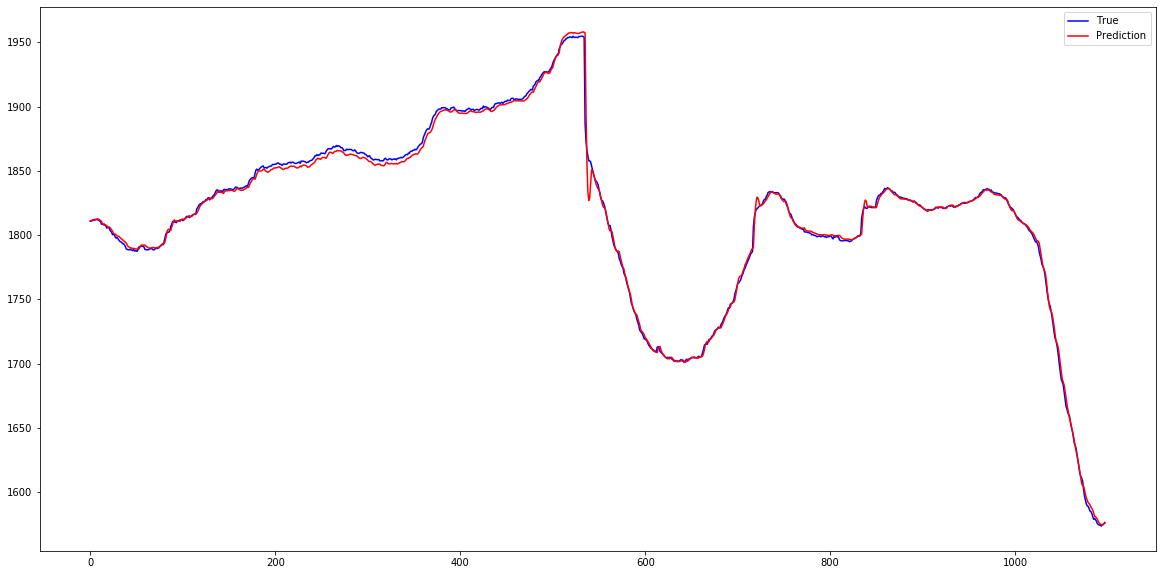

In [ ]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(Ydata, label='True', color = 'Blue')
ax.plot(testPredict, label='Prediction', color='Red')
ax.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
mse = mean_squared_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
rmse = np.sqrt(mse)

In [ ]:
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  2.101766346304363
MSE:  13.852163743552039
RMSE:  3.721849505763504


## 일반 GRU 모델

In [ ]:
model = Sequential()

model.add(GRU(128, return_sequences=False, input_shape=(7, 1)))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='tanh'))
    
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_15 (GRU)                 (None, 128)               49920     
_________________________________________________________________
dropout_39 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 129       
Total params: 50,049
Trainable params: 50,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start = time.time()
model.fit(X_train_t, y_train, batch_size = 30, epochs = 50)
end = time.time()
total = end-start

print(total)

Epoch 1/50
3308/3308 [==============================] - 2s 456us/step - loss: 0.0336
Epoch 2/50
3308/3308 [==============================] - 1s 303us/step - loss: 0.0035
Epoch 3/50
3308/3308 [==============================] - 1s 270us/step - loss: 0.0033
Epoch 4/50
3308/3308 [==============================] - 1s 353us/step - loss: 0.0030
Epoch 5/50
3308/3308 [==============================] - 1s 303us/step - loss: 0.0023
Epoch 6/50
3308/3308 [==============================] - 1s 252us/step - loss: 0.0018
Epoch 7/50
3308/3308 [==============================] - 1s 335us/step - loss: 0.0019
Epoch 8/50
3308/3308 [==============================] - 1s 318us/step - loss: 0.0018
Epoch 9/50
3308/3308 [==============================] - 1s 261us/step - loss: 0.0016
Epoch 10/50
3308/3308 [==============================] - 1s 280us/step - loss: 0.0015
Epoch 11/50
3308/3308 [==============================] - 1s 306us/step - loss: 0.0015 0s - loss: 0
Epoch 12/50
3308/3308 [===========================

<function matplotlib.pyplot.show(*args, **kw)>

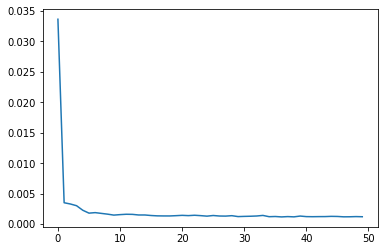

In [ ]:
plt.plot(model.history.history['loss'])
plt.show

In [ ]:
y_pred = model.predict(X_test_t)
y_pred = pd.DataFrame(y_pred, columns = ["price"], index = y_test.index)

In [ ]:
testPredict = scaler.inverse_transform(y_pred)
Ydata = scaler.inverse_transform(y_test)

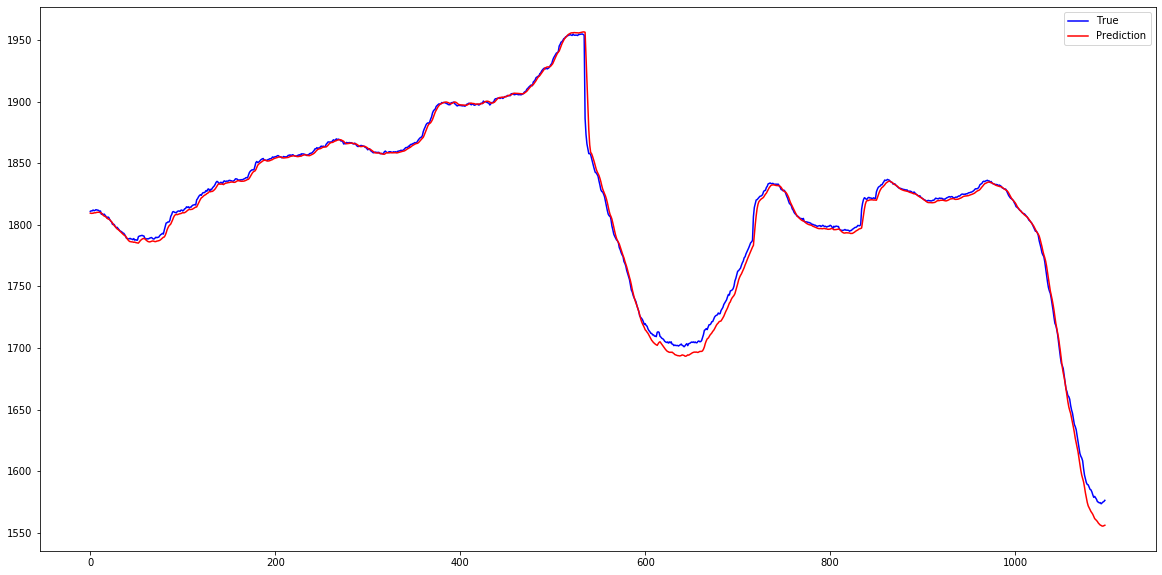

In [ ]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(Ydata, label='True', color = 'Blue')
ax.plot(testPredict, label='Prediction', color='Red')
ax.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
mse = mean_squared_error(scaler.inverse_transform(y_pred),scaler.inverse_transform(y_test))
rmse = np.sqrt(mse)

In [ ]:
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  3.096917628998746
MSE:  31.660870821987277
RMSE:  5.626799340831987
